## Modeling Stellar Evolution and Element Isotope Production 
Using 2D Interpolation in Python

In [9]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from isotopeyields import make_yield_grid, interpolate_all, plot_yields_by_element
from massloss import get_effective_mass, endpoints

In [10]:
# ---MAIN SEQUENCE LIFETIME---

def main_sequence_lifetime(mass):
    ''' 
    input mass in solar masses
    return t_ms in years

    '''
    lifetime = (10**10) * mass**-2.5
    return lifetime

In [11]:
# ---MASS LOSS FUNCTION---

def effective_final_mass(mass, Z):
    #step 1: convert to Fe/H ratio
    #using Zsun = 0.019
    FeH = np.log10( (Z/(1-Z)) / (0.019/(1-0.019)) )
    #see the other notebook for what went on with this
    final_mass = get_effective_mass(endpoints, FeH, mass)
    return final_mass

In [12]:
# ---REMNANT CLASSIFICATION---

def classify_remnant(M_eff):

    ''' 
    M_eff = effective final mass after stellar winds
    
    '''

    if M_eff < 0.5:
        return "Low-mass star (fully convective) → C-O White Dwarf"

    elif M_eff < 4:
        return "C-O White Dwarf"

    elif M_eff < 8:
        return "O-Ne White Dwarf"

    elif M_eff < 20:
        return "Core-collapse SN → Neutron Star"

    elif M_eff < 25:
        return "Core-collapse SN → Black Hole (fallback)"

    else:
        return "Direct Collapse Black Hole"

In [13]:
# ---YIELD GRID IMPORT---

df_Z00001 = make_yield_grid("../final_project/yield_data/Z00001")
df_Z00002 = make_yield_grid("../final_project/yield_data/Z00002")
df_Z0001 = make_yield_grid("../final_project/yield_data/Z0001")
df_Z0006 = make_yield_grid("../final_project/yield_data/Z0006")
df_Z001 = make_yield_grid("../final_project/yield_data/Z001")
df_Z002 = make_yield_grid("../final_project/yield_data/Z002")
df_Z003 = make_yield_grid("../final_project/yield_data/Z003")

yield_grids = {
    0.00001: df_Z00001,
    0.00002: df_Z00002,
    0.0001: df_Z0001,
    0.0006: df_Z0006,
    0.001: df_Z001,
    0.002: df_Z002,
    0.003: df_Z003
}



In [14]:
# ---USER INTERFACE---

def run_model():

    print("\n*** Stellar Evolution Predictor ***\n")

    M = float(input("Enter initial mass (M_sun): "))
    Z = float(input("Enter metallicity (Z): "))

    # lifetime
    t_ms = main_sequence_lifetime(M)

    # mass loss
    M_eff = effective_final_mass(M, Z)

    # remnant
    remnant = classify_remnant(M_eff)

    # yields
    df_yields = interpolate_all(yield_grids, M, Z)
    df_yields

    print("\n--- RESULT ---")
    print(f"Main Sequence Lifetime: {t_ms:.3e} years")
    print(f"Effective Final Mass: {M_eff:.2f} M_sun")
    print(f"Predicted Remnant: {remnant}")
    
    print("\nGenerating isotope yield histogram...")
    plot_yields_by_element(df_yields)







*** Stellar Evolution Predictor ***


--- RESULT ---
Main Sequence Lifetime: 6.415e+08 years
Effective Final Mass: nan M_sun
Predicted Remnant: Direct Collapse Black Hole

Generating isotope yield histogram...


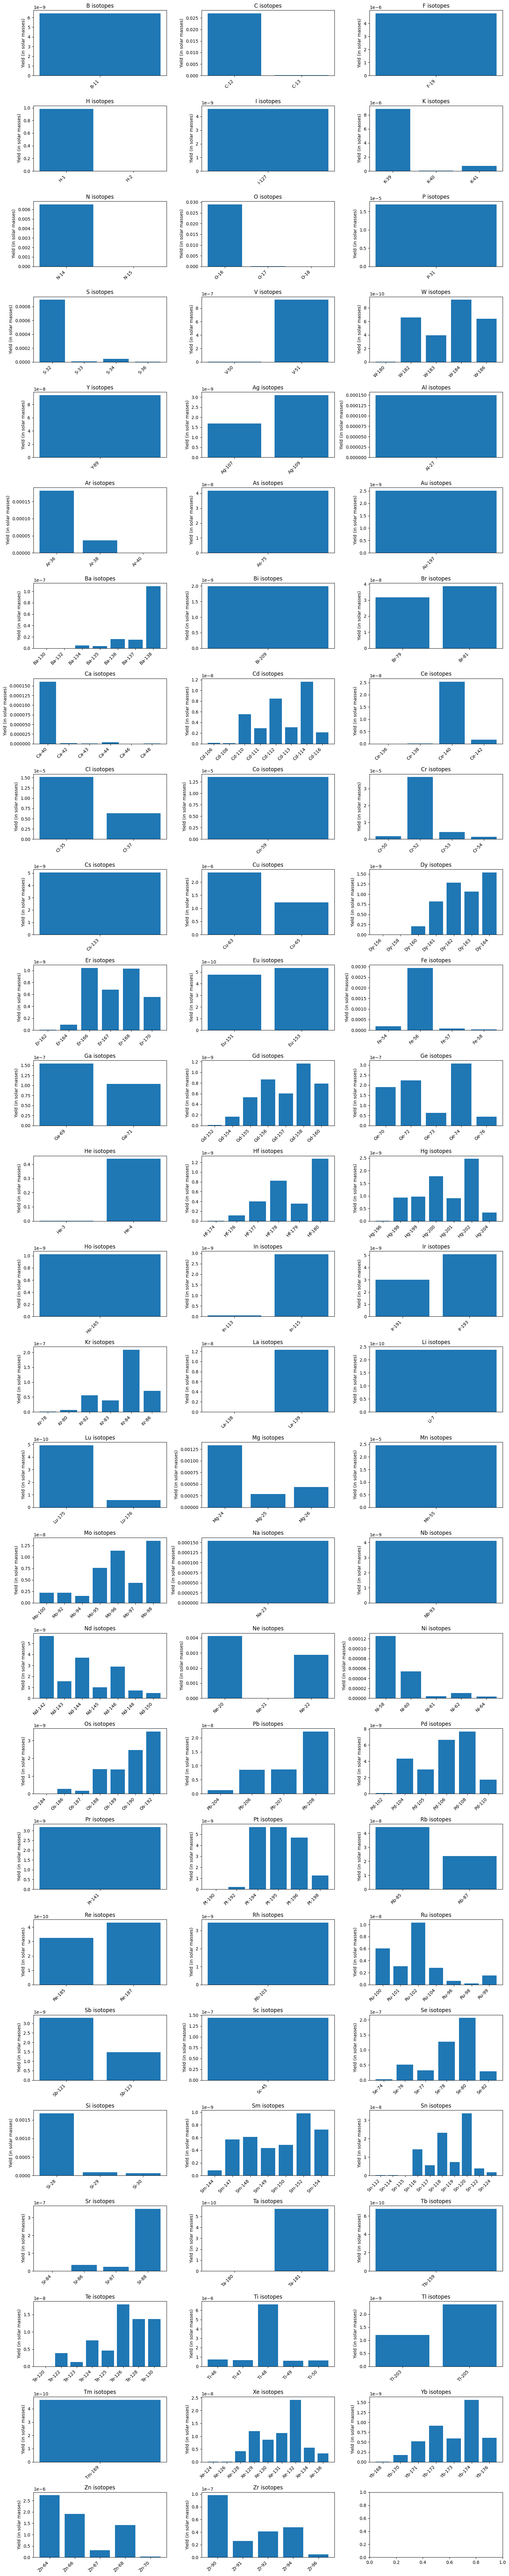

In [17]:
# ---RUN MODEL---
run_model()